#### Visualizing the Decision Tree classifier

In [1]:
import numpy as np
import pandas as pd
import graphviz
import pylab as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_2.csv", index_col = 0)
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


In [3]:
# Separate the target attribute
vs_records = vstable[['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']]
vs_target = vstable.Incidentals

In [4]:
# Create dummy varialbes
vs_matrix = pd.get_dummies(vs_records[['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']])
vs_matrix.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,False,True,True,False,False
2,54000,33,12,3.4,True,False,False,False,True
3,32000,20,42,1.6,True,False,False,True,False
4,59000,70,16,4.2,True,False,False,False,True
5,37000,35,25,3.2,False,True,True,False,False


In [5]:
# Divide into training and testing set
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size = 0.2, random_state = 33)
print(vs_train.shape)
print(vs_test.shape)

(40, 9)
(10, 9)


In [6]:
# Decision Tree classifer 1
dtclf = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize Decision Tree classifier
cv_scores = cross_val_score(dtclf, vs_train, vs_target_train, cv = 5) # Perform 5-fold Cross-Validation
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.47 (+/- 0.37)


In [7]:
dtclf = dtclf.fit(vs_train, vs_target_train) # Fit the model to the training set
print("Accuracy on Training: ", dtclf.score(vs_train, vs_target_train))

Accuracy on Training:  1.0


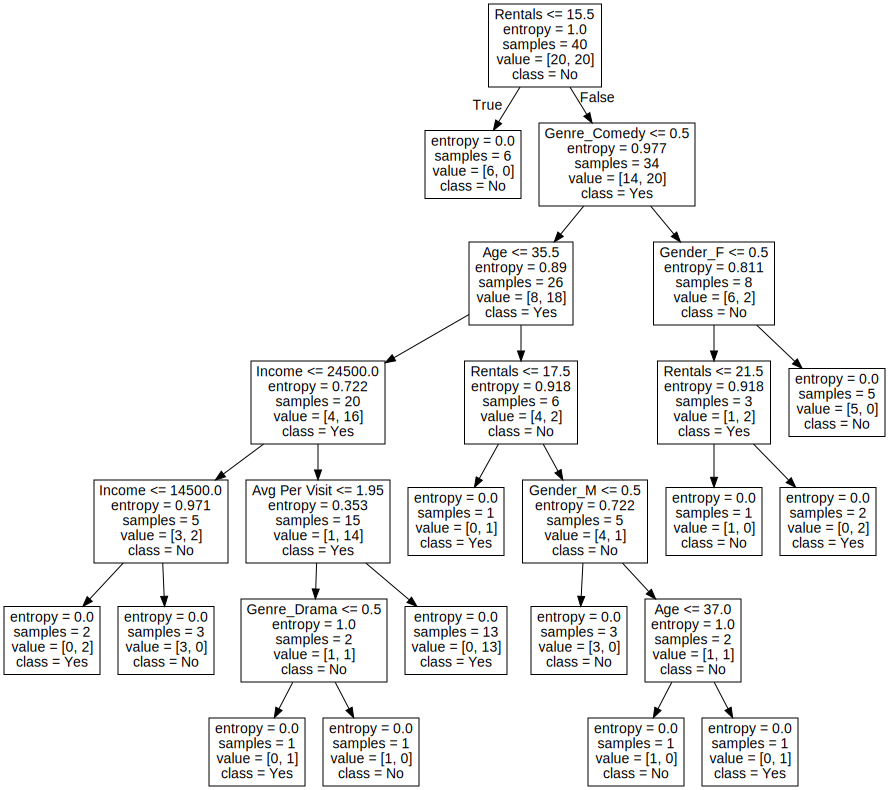

In [8]:
# Export the Decision Tree classifier to a DOT file format
export_graphviz(dtclf, out_file = 'tree.dot', feature_names = vs_train.columns, class_names = ["No","Yes"])

# Open the generated DOT file to read
with open("tree.dot") as f:
    dot_graph = f.read()

# Use graphviz to visualize
graphviz.Source(dot_graph)

Feature Importances:
[0.2284543  0.13011114 0.28557041 0.08250975 0.09338344 0.04024101
 0.         0.08972995 0.05      ]


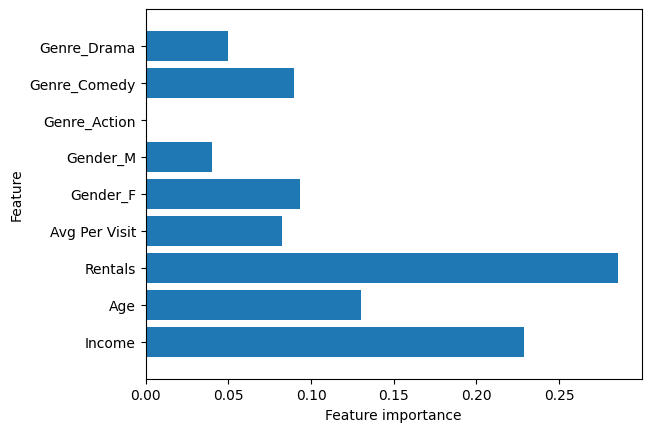

In [9]:
# plot the feature importances
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtclf, len(vs_matrix.columns), vs_matrix.columns)

# Print the feature importances
print("Feature Importances:\n{}".format(dtclf.feature_importances_))

In [10]:
print("Feature Importances:\n{}".format(dtclf.feature_importances_))

Feature Importances:
[0.2284543  0.13011114 0.28557041 0.08250975 0.09338344 0.04024101
 0.         0.08972995 0.05      ]


In [11]:
# Decision Tree classifer 2 with min_samples_leaf
dtclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 3) # Initialize Decision Tree classifier
cv_scores = cross_val_score(dtclf, vs_train, vs_target_train, cv = 5) # Perform 5-fold Cross-Validation
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.55 (+/- 0.51)


In [12]:
dtclf = dtclf.fit(vs_train, vs_target_train) # Fit the model to the training set
print("Accuracy on Training: ", dtclf.score(vs_train, vs_target_train))

Accuracy on Training:  0.85


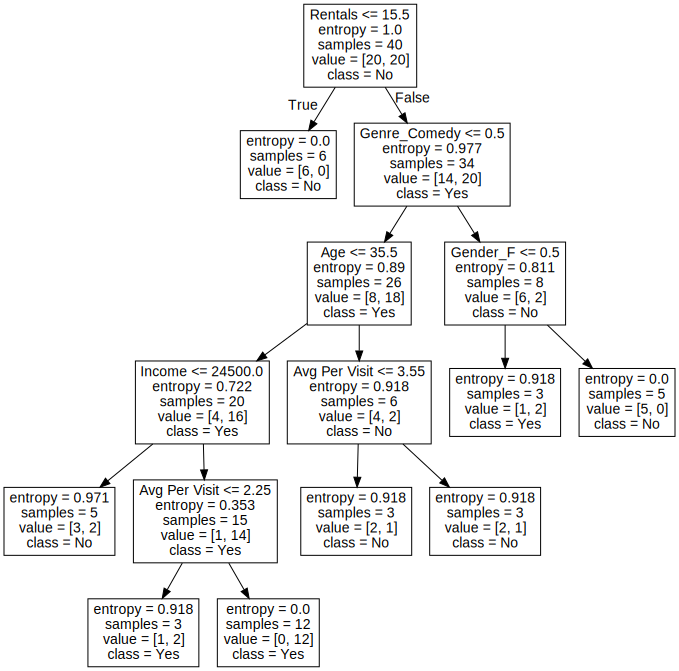

In [13]:
# Export the Decision Tree classifier to a DOT file format
export_graphviz(dtclf, out_file = 'tree.dot', feature_names = vs_train.columns, class_names = ["No","Yes"])

# Open the generated DOT file to read
with open("tree.dot") as f:
    dot_graph = f.read()

# Use graphviz to visualize
graphviz.Source(dot_graph)

In [14]:
# Decision Tree classifer 3 with max_depth
dtclf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # Initialize Decision Tree classifier
cv_scores = cross_val_score(dtclf, vs_train, vs_target_train, cv = 5) # Perform 5-fold Cross-Validation
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.50 (+/- 0.45)


In [15]:
dtclf = dtclf.fit(vs_train, vs_target_train) # Fit the model to the training set
print("Accuracy on Training: ", dtclf.score(vs_train, vs_target_train))

Accuracy on Training:  0.9


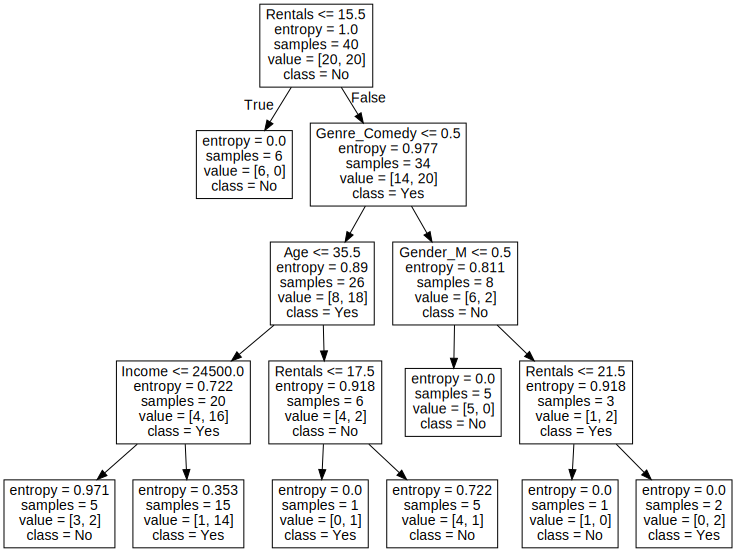

In [16]:
# Export the Decision Tree classifier to a DOT file format
export_graphviz(dtclf, out_file = 'tree.dot', feature_names = vs_train.columns, class_names = ["No","Yes"])

# Open the generated DOT file to read
with open("tree.dot") as f:
    dot_graph = f.read()

# Use graphviz to visualize
graphviz.Source(dot_graph)

In [17]:
# Decision Tree classifer 4 with min_samples_leaf and max_depth
dtclf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 3, max_depth = 4) # Initialize Decision Tree classifier
cv_scores = cross_val_score(dtclf, vs_train, vs_target_train, cv = 5) # Perform 5-fold Cross-Validation
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.65 (+/- 0.29)


In [18]:
dtclf = dtclf.fit(vs_train, vs_target_train) # Fit the model to the training set
print("Accuracy on Training: ", dtclf.score(vs_train, vs_target_train))

Accuracy on Training:  0.85


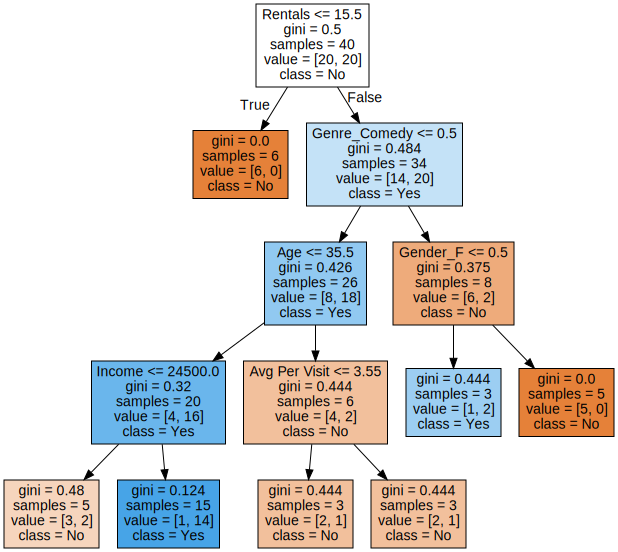

In [19]:
# Export the Decision Tree classifier to a DOT file format
export_graphviz(dtclf, out_file = 'tree.dot', feature_names = vs_train.columns, class_names = ["No","Yes"], filled = True)

# Open the generated DOT file to read
with open("tree.dot") as f:
    dot_graph = f.read()

# Use graphviz to visualize
graphviz.Source(dot_graph)